Тестовое задание
================

## Pandas

Файл `task_history.csv` содержит исторические данные системы сборки (e.g. *jenkins*, *teamcity*, etc.)

Каждая запись в истории описывает отдельный запуск задачи `build_name` на рабочей машине `worker`.<br/>
Для любого запуска известны автор `author` и проект `project`, в рамках которого был запущен расчет данной задачи.

Импортируем нужные библиотеки, считаем данные и посмотрим на них.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [ ]:
url = 'https://drive.google.com/file/d/1b4Pb76WQ7VnHFbVLqKup29jTtrxGC6wU/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
task_history = pd.read_csv(path)

In [ ]:
task_history.head()

,task_id,start_time,finish_time,status,worker,build_name,author,project
0,44973,2005-06-26 09:05:45.716,2005-06-26 09:05:45.997,success,worker_00,test_cyan_texture,Kenny Smith,Halo Anniversary
1,44974,2005-06-26 09:05:46.200,2005-06-26 09:05:46.497,success,worker_01,test_cyan_texture,Kenny Smith,Halo Anniversary
2,44975,2005-06-26 09:05:47.357,2005-06-26 09:06:01.213,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary
3,44977,2005-06-26 09:06:19.273,2005-06-26 09:10:44.734,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary
4,44979,2005-06-26 09:12:00.883,2005-06-26 09:14:29.941,success,worker_04,test_cyan_texture,Kenny Smith,Halo Anniversary


In [ ]:
task_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160492 entries, 0 to 160491
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   task_id      160492 non-null  int64 
 1   start_time   160492 non-null  object
 2   finish_time  160492 non-null  object
 3   status       160492 non-null  object
 4   worker       160492 non-null  object
 5   build_name   160492 non-null  object
 6   author       160492 non-null  object
 7   project      160492 non-null  object
dtypes: int64(1), object(7)
memory usage: 9.8+ MB


Пропусков нет, периведем колонки с датой к нужному формату.

In [ ]:
task_history['start_time'] = (pd.to_datetime(task_history['start_time'],
                                             format='%Y-%m-%d %H:%M:%S.%f'))

task_history['finish_time'] = (pd.to_datetime(task_history['finish_time'],
                                              format='%Y-%m-%d %H:%M:%S.%f'))

In [ ]:
task_history.describe()

,task_id
count,160492.000000
mean,115588.483065
std,66762.399318
min,5659.000000
25%,57489.750000
50%,107596.500000
75%,183494.250000
max,225843.000000


In [ ]:
task_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160492 entries, 0 to 160491
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   task_id      160492 non-null  int64         
 1   start_time   160492 non-null  datetime64[ns]
 2   finish_time  160492 non-null  datetime64[ns]
 3   status       160492 non-null  object        
 4   worker       160492 non-null  object        
 5   build_name   160492 non-null  object        
 6   author       160492 non-null  object        
 7   project      160492 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 9.8+ MB


### Задача 1

Для каждой недели распечатайте топ-3 пользователей, потребивших наибольшее количество машиночасов.

Выведите для данных пользователей процент потребленных ресурсов от общего объема расчетов за эту неделю.

Создадим колонку с временем работы каждой таски и номером недели. У нас данные за 1 год, поэтому делать разбивку на год/неделя не имеет смысла.


In [ ]:
task_history['time_delta'] = (task_history['finish_time']
                              - task_history['start_time'])

task_history['week_number'] = (task_history['start_time']
                               .dt.isocalendar()
                               .week.astype('int'))

task_history.head()

,task_id,start_time,finish_time,status,worker,build_name,author,project,time_delta,week_number
0,44973,2005-06-26 09:05:45.716,2005-06-26 09:05:45.997,success,worker_00,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:00:00.281000,25
1,44974,2005-06-26 09:05:46.200,2005-06-26 09:05:46.497,success,worker_01,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:00:00.297000,25
2,44975,2005-06-26 09:05:47.357,2005-06-26 09:06:01.213,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:00:13.856000,25
3,44977,2005-06-26 09:06:19.273,2005-06-26 09:10:44.734,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:04:25.461000,25
4,44979,2005-06-26 09:12:00.883,2005-06-26 09:14:29.941,success,worker_04,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:02:29.058000,25


In [ ]:
task_history['status'].value_counts()

success    137025
fail        16986
cancel       6481
Name: status, dtype: int64

In [ ]:
task_history['week_number'].value_counts()

27    42436
28    41670
26    39293
25    37093
Name: week_number, dtype: int64

Нужно рассчитать общее количество машиночасов, поэтому не будем разделять задачи по статусам. Сгрупируем по неделям и сначала найдем для каждого пользователя количество потраченых машиночасов, потом узнвем сколько всего было потрачено машиночасов на каждую неделю и найдем процент потребленных ресурсов от общего объема.

In [ ]:
time_per_author = (task_history.groupby(['week_number', 'author'])
                  .agg({'time_delta': 'sum'}).reset_index())

In [ ]:
time_per_author

,week_number,author,time_delta
0,25,Bendy Python,172 days 10:48:37.424000
1,25,Eric Ivanov,1 days 16:07:52.822000
2,25,Eric Koltron,2 days 08:51:30.102000
3,25,Eric Kotlin,1 days 23:39:44.061000
4,25,Eric Smith,7 days 10:45:43.437000
...,...,...,...
163,28,Polly Koltron,5 days 13:39:44.393000
164,28,Polly Kotlin,8 days 19:45:09.259000
165,28,Polly Smith,3 days 10:00:07.169000
166,28,Polly Smoozy,3 days 05:47:07.365000


In [ ]:
total_time_df = (time_per_author
                 .groupby('week_number', as_index=False)['time_delta']
                 .sum().rename(columns={'time_delta': 'total_time'}))
total_time_df

,week_number,total_time
0,25,378 days 02:05:33.016000
1,26,517 days 04:27:13.243000
2,27,437 days 10:05:08.459000
3,28,378 days 01:13:38.523000


In [ ]:
time_per_author = (time_per_author
                   .merge(total_time_df, how='left', on='week_number')
                   .rename(columns={'time_delta': 'time_per_author'}))

In [ ]:
time_per_author['percentage'] = (time_per_author['time_per_author']
                                 / time_per_author['total_time'] * 100)
time_per_author.head()

,week_number,author,time_per_author,total_time,percentage
0,25,Bendy Python,172 days 10:48:37.424000,378 days 02:05:33.016000,45.611287
1,25,Eric Ivanov,1 days 16:07:52.822000,378 days 02:05:33.016000,0.442263
2,25,Eric Koltron,2 days 08:51:30.102000,378 days 02:05:33.016000,0.626601
3,25,Eric Kotlin,1 days 23:39:44.061000,378 days 02:05:33.016000,0.525256
4,25,Eric Smith,7 days 10:45:43.437000,378 days 02:05:33.016000,1.970027


In [ ]:
top_n_per_week = (time_per_author.groupby('week_number')
                  .apply(lambda x: x.nlargest(3, 'time_per_author'))
                  .reset_index(drop=True))
top_n_per_week

,week_number,author,time_per_author,total_time,percentage
0,25,Bendy Python,172 days 10:48:37.424000,378 days 02:05:33.016000,45.611287
1,25,Marsha Koltron,17 days 19:39:05.020000,378 days 02:05:33.016000,4.712883
2,25,Java Smoozy,11 days 06:44:32.711000,378 days 02:05:33.016000,2.983686
3,26,Bendy Python,200 days 13:58:23.772000,517 days 04:27:13.243000,38.783414
4,26,Marsha Koltron,31 days 12:49:40.498000,517 days 04:27:13.243000,6.097327
5,26,John Ivanov,22 days 04:22:53.816000,517 days 04:27:13.243000,4.289092
6,27,Bendy Python,177 days 09:09:24.331000,437 days 10:05:08.459000,40.551743
7,27,Java Smoozy,21 days 11:06:05.407000,437 days 10:05:08.459000,4.906623
8,27,Eric Smith,14 days 10:21:00.212000,437 days 10:05:08.459000,3.299173
9,28,Bendy Python,172 days 02:03:33.829000,378 days 01:13:38.523000,45.519188


### Задача 2

Отобразите график с ежедневным потреблением машинного времени каждым проектом.

Добавим разбивку по месяцам-дням, сгрупируем по проектам и отобразим график.

In [ ]:
task_history.head()

,task_id,start_time,finish_time,status,worker,build_name,author,project,time_delta,week_number
0,44973,2005-06-26 09:05:45.716,2005-06-26 09:05:45.997,success,worker_00,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:00:00.281000,25
1,44974,2005-06-26 09:05:46.200,2005-06-26 09:05:46.497,success,worker_01,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:00:00.297000,25
2,44975,2005-06-26 09:05:47.357,2005-06-26 09:06:01.213,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:00:13.856000,25
3,44977,2005-06-26 09:06:19.273,2005-06-26 09:10:44.734,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:04:25.461000,25
4,44979,2005-06-26 09:12:00.883,2005-06-26 09:14:29.941,success,worker_04,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:02:29.058000,25


In [ ]:
task_history['date'] = task_history['start_time'].dt.strftime('%m-%d')
task_history.head()

,task_id,start_time,finish_time,status,worker,build_name,author,project,time_delta,week_number,date
0,44973,2005-06-26 09:05:45.716,2005-06-26 09:05:45.997,success,worker_00,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:00:00.281000,25,06-26
1,44974,2005-06-26 09:05:46.200,2005-06-26 09:05:46.497,success,worker_01,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:00:00.297000,25,06-26
2,44975,2005-06-26 09:05:47.357,2005-06-26 09:06:01.213,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:00:13.856000,25,06-26
3,44977,2005-06-26 09:06:19.273,2005-06-26 09:10:44.734,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:04:25.461000,25,06-26
4,44979,2005-06-26 09:12:00.883,2005-06-26 09:14:29.941,success,worker_04,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:02:29.058000,25,06-26


In [ ]:
task_his_project = (task_history.groupby(['date', 'project'],
                                        as_index=False)['time_delta']
                    .sum().rename(columns={'time_delta': 'machine_time'}))

In [ ]:
task_his_project.head()

,date,project,machine_time
0,06-20,Halo Anniversary,1 days 03:40:33.074000
1,06-20,Mud Runner,8 days 11:36:55.307000
2,06-20,Quake Champions,3 days 07:32:01.192000
3,06-20,Timeshift,16 days 02:31:50.384000
4,06-20,World War Z,6 days 06:25:24.354000


In [ ]:
task_his_project['project'].value_counts()

Halo Anniversary    28
Mud Runner          28
Quake Champions     28
Timeshift           28
World War Z         28
Name: project, dtype: int64

Для нормального отображения на графике переведем формат timedelta в секунды.

In [ ]:
task_his_project['machine_time'] = (task_his_project['machine_time']
                                    .dt.total_seconds())

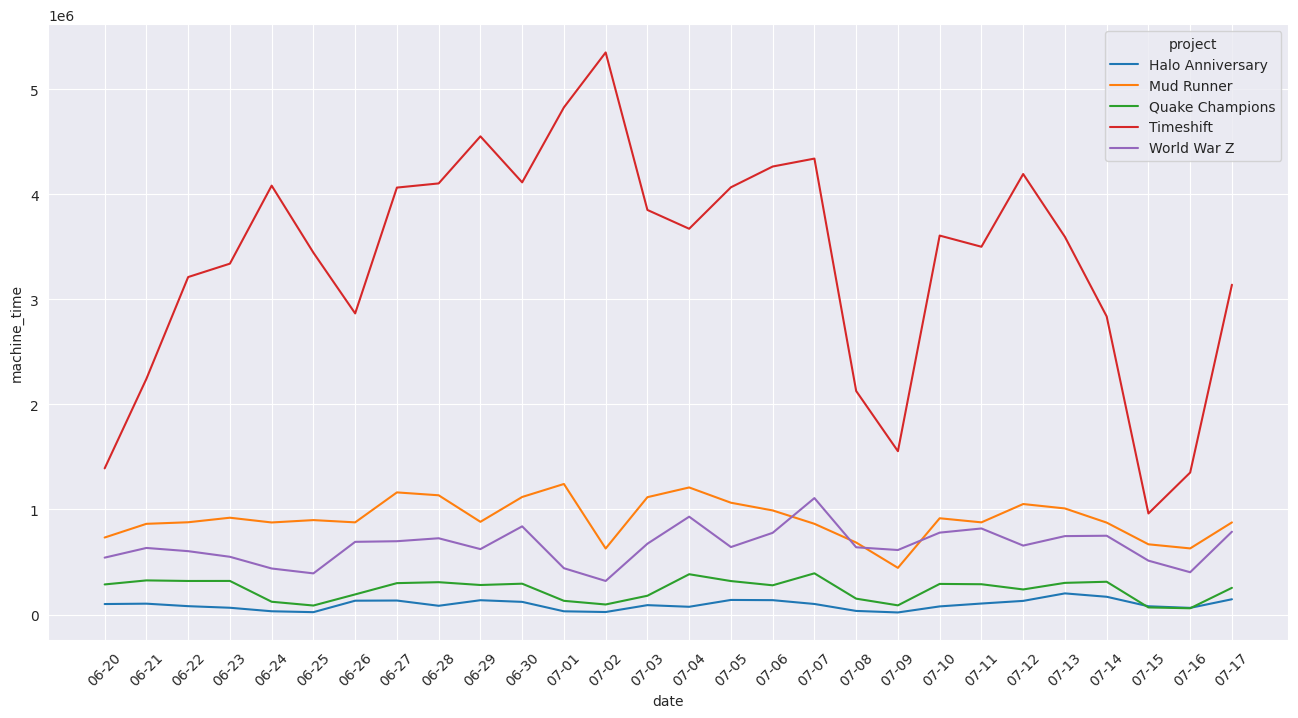

In [ ]:
plt.figure(figsize=(16, 8))
plt.xticks(rotation=45)
sns.lineplot(data=task_his_project, x=task_his_project['date'],
             y='machine_time', hue='project');

### Задача 3

Рассмотрим *еженедельное* общее потребление ресурсов. На второй неделе можно заметить всплеск нагрузки с ее последующим планомерным снижением.

Проанализируйте предоставленные данные и найдите, с чем связано подобное поведение.

Из графика потребления ресурсов по дням мы уже видим всплеск в потреблении на 2 недели у проекта "Timeshift". Попробуем детально разобраться почему этот проект стал потреблять больше машиночасов.

In [ ]:
task_history.head()

,task_id,start_time,finish_time,status,worker,build_name,author,project,time_delta,week_number,date
0,44973,2005-06-26 09:05:45.716,2005-06-26 09:05:45.997,success,worker_00,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:00:00.281000,25,06-26
1,44974,2005-06-26 09:05:46.200,2005-06-26 09:05:46.497,success,worker_01,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:00:00.297000,25,06-26
2,44975,2005-06-26 09:05:47.357,2005-06-26 09:06:01.213,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:00:13.856000,25,06-26
3,44977,2005-06-26 09:06:19.273,2005-06-26 09:10:44.734,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:04:25.461000,25,06-26
4,44979,2005-06-26 09:12:00.883,2005-06-26 09:14:29.941,success,worker_04,test_cyan_texture,Kenny Smith,Halo Anniversary,0 days 00:02:29.058000,25,06-26


Для начала посмотрим общее потребление ресурсов в разбивки по неделям.

In [ ]:
resourses_per_week = (task_history.groupby('week_number',
                                           as_index=False)['time_delta']
                    .sum().rename(columns={'time_delta': 'machine_time'}))

In [ ]:
resourses_per_week.head()

,week_number,machine_time
0,25,378 days 02:05:33.016000
1,26,517 days 04:27:13.243000
2,27,437 days 10:05:08.459000
3,28,378 days 01:13:38.523000


In [ ]:
resourses_per_week['machine_time'] = (resourses_per_week['machine_time']
                                      .astype('timedelta64[D]'))

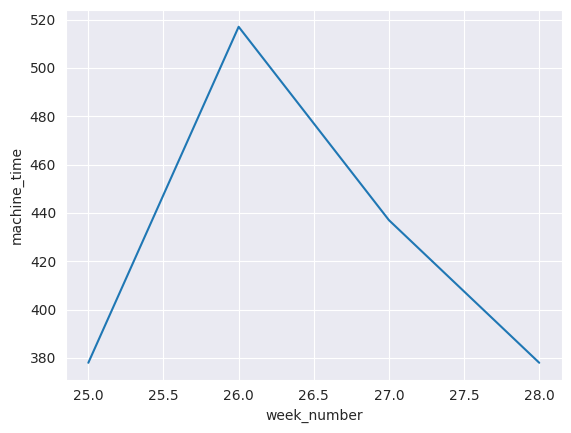

In [ ]:
sns.lineplot(data=resourses_per_week, x='week_number', y='machine_time');

Мы видим резкий всплеск потребления ресурсов на 26 (второй) неделе.
Теперь посмотрим по неделям в разбивке на проекты.

In [ ]:
resourses_per_week_project = (task_history.groupby(['week_number', 'project'],
                                           as_index=False)['time_delta']
                    .sum().rename(columns={'time_delta': 'machine_time'}))

resourses_per_week_project['machine_time'] = (
    resourses_per_week_project['machine_time']
    .astype('timedelta64[D]')
)

In [ ]:
resourses_per_week_project.head(15)

,week_number,project,machine_time
0,25,Halo Anniversary,6.0
1,25,Mud Runner,70.0
2,25,Quake Champions,19.0
3,25,Timeshift,238.0
4,25,World War Z,44.0
5,26,Halo Anniversary,7.0
6,26,Mud Runner,84.0
7,26,Quake Champions,18.0
8,26,Timeshift,357.0
9,26,World War Z,50.0


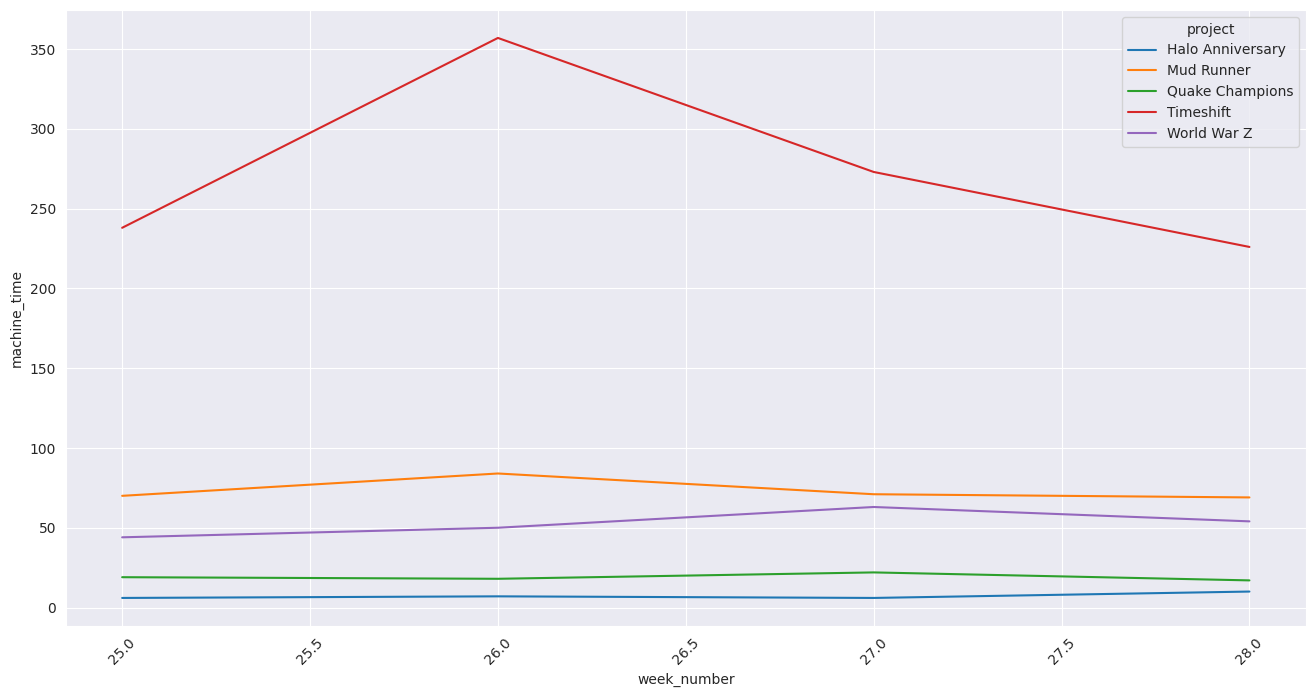

In [ ]:
plt.figure(figsize=(16, 8))
plt.xticks(rotation=45)
sns.lineplot(data=resourses_per_week_project, x='week_number',
             y='machine_time', hue='project');

In [ ]:
(task_history.groupby(['week_number', 'project'])['time_delta']
 .agg(['count', 'mean', 'sum']))

count                      mean  \
week_number project                                             
25          Halo Anniversary   2592 0 days 00:03:24.853432098   
            Mud Runner         6606 0 days 00:15:15.772678171   
            Quake Champions    2570 0 days 00:10:41.389018287   
            Timeshift         18604 0 days 00:18:26.644630455   
            World War Z        6721 0 days 00:09:32.797519119   
26          Halo Anniversary   2805 0 days 00:03:39.463146167   
            Mud Runner         6482 0 days 00:18:44.469556155   
            Quake Champions    2267 0 days 00:11:39.204782531   
            Timeshift         20889 0 days 00:24:38.046631384   
            World War Z        6850 0 days 00:10:30.717391240   
27          Halo Anniversary   2879 0 days 00:03:21.345901701   
            Mud Runner         7176 0 days 00:14:20.532187430   
            Quake Champions    2771 0 days 00:11:26.207766871   
            Timeshift         21178 0 days 00:18:36.374776418   
            World War Z        8432 0 days 00:10:51.587748339   
28          Halo Anniversary   3456 0 days 00:04:17.755206307   
            Mud Runner         6910 0 days 00:14:26.791932272   
            Quake Champions    2489 0 days 00:10:10.961077942   
            Timeshift         21341 0 days 00:15:17.799132233   
            World War Z        7474 0 days 00:10:25.615583890   

                                                  sum  
week_number project                                    
25          Halo Anniversary   6 days 03:29:40.096000  
            Mud Runner        70 days 00:26:34.312000  
            Quake Champions   19 days 01:52:49.777000  
            Timeshift        238 days 06:53:36.705000  
            World War Z       44 days 13:22:52.126000  
26          Halo Anniversary   7 days 02:59:54.125000  
            Mud Runner        84 days 08:40:11.663000  
            Quake Champions   18 days 08:18:17.242000  
            Timeshift        357 days 08:21:56.083000  
            World War Z       50 days 00:06:54.130000  
27          Halo Anniversary   6 days 17:01:14.851000  
            Mud Runner        71 days 11:19:38.977000  
            Quake Champions   22 days 00:11:21.722000  
            Timeshift        273 days 15:23:05.015000  
            World War Z       63 days 14:09:47.894000  
28          Halo Anniversary  10 days 07:26:41.993000  
            Mud Runner        69 days 07:45:32.252000  
            Quake Champions   17 days 14:24:42.123000  
            Timeshift        226 days 16:45:51.281000  
            World War Z       54 days 02:50:50.874000

Теперь посмотрим детально на статус выполнения задач, какое количество закончилось успехом, неудачей или отменой пользователем.

In [ ]:
dt = task_history.groupby(['week_number', 'project'])['status'].value_counts()
dt

week_number  project           status 
25           Halo Anniversary  success     2540
                               fail          43
                               cancel         9
             Mud Runner        success     5596
                               fail         926
                               cancel        84
             Quake Champions   success     2485
                               fail          66
                               cancel        19
             Timeshift         success    16797
                               fail        1192
                               cancel       615
             World War Z       success     6405
                               fail         253
                               cancel        63
26           Halo Anniversary  success     2706
                               fail          85
                               cancel        14
             Mud Runner        success     6154
                               fail         277
 

Видно что на 26 (второй) неделе по проекту "Timeshift" стало меньше успешно выполненых задач. И кратно увеличилось число задач со статусом ```fail, cancel```. Сделаем дополнительную колонку где будет проставлена 1 тем задачам которые выполнены успешно и 0 для других.



In [ ]:
task_history['success'] = (task_history['status']
                           .apply(lambda x: 1 if x == 'success' else 0))

In [ ]:
tasks_26_week = (task_history[task_history['week_number'] == 26]
                 .groupby('project')['success'].agg(['count', 'sum'])
                 .reset_index()
                 .rename(columns={'count': 'all_tasks',
                                  'sum': 'success_tasks'}))

tasks_26_week['success_rate'] = (tasks_26_week['success_tasks']
                                 / tasks_26_week['all_tasks'] * 100)

Посмотрим на процент успешно выполненых задач по проектам на 26 неделе.

In [ ]:
tasks_26_week

,project,all_tasks,success_tasks,success_rate
0,Halo Anniversary,2805,2706,96.470588
1,Mud Runner,6482,6154,94.939833
2,Quake Champions,2267,2168,95.632995
3,Timeshift,20889,11988,57.389056
4,World War Z,6850,6534,95.386861


Мы видим что на 26 неделе явно были проблемы с успешным завершением задач в обозначеном проекте. Посмотрим что происходило в другие недели.

In [ ]:
(task_history.groupby(['week_number', 'project'])
.agg(total_tasks=('success', 'count'),
     success_tasks=('success', 'sum'),
     success_rate=('success', 'mean')))

total_tasks  success_tasks  success_rate
week_number project                                                   
25          Halo Anniversary         2592           2540      0.979938
            Mud Runner               6606           5596      0.847109
            Quake Champions          2570           2485      0.966926
            Timeshift               18604          16797      0.902870
            World War Z              6721           6405      0.952983
26          Halo Anniversary         2805           2706      0.964706
            Mud Runner               6482           6154      0.949398
            Quake Champions          2267           2168      0.956330
            Timeshift               20889          11988      0.573891
            World War Z              6850           6534      0.953869
27          Halo Anniversary         2879           2755      0.956929
            Mud Runner               7176           6742      0.939521
            Quake Champions          2771           2652      0.957055
            Timeshift               21178          15792      0.745679
            World War Z              8432           7762      0.920541
28          Halo Anniversary         3456           3276      0.947917
            Mud Runner               6910           6480      0.937771
            Quake Champions          2489           2313      0.929289
            Timeshift               21341          18839      0.882761
            World War Z              7474           7041      0.942066

Похоже проблема локализована именно на проекте "Timeshift" на 26 неделе. Посмотрим детальнее какие задачи запускались в эту неделю на этом проекте.

In [ ]:
timeshift_projekt_26_week = (task_history[(task_history['week_number'] == 26)
 & (task_history['project'] == 'Timeshift')])

In [ ]:
timeshift_projekt_26_week['build_name'].value_counts()

build_cyan_executable        5507
validate_green_executable    4608
build_cyan_texture           2459
build_yellow_sound           1676
validate_blue_executable     1071
validate_blue_sound          1054
deploy_cyan_texture           795
test_red_data                 609
test_green_data               568
build_red_sound               382
build_red_library             280
build_green_data              255
deploy_green_data             178
test_red_texture              174
test_cyan_data                172
build_red_data                159
build_green_texture           158
build_red_executable          152
validate_green_library        116
build_green_sound             101
build_red_texture              44
deploy_red_texture             42
build_yellow_data              40
validate_cyan_sound            35
deploy_yellow_executable       35
test_blue_executable           33
test_yellow_texture            33
test_blue_library              27
test_blue_texture              25
test_red_libra

In [ ]:
(timeshift_projekt_26_week.groupby(['build_name'])
.agg(total_tasks=('success', 'count'),
     success_tasks=('success', 'sum'),
     success_rate=('success', 'mean'))
.sort_values('total_tasks', ascending=False)).head(15)

,total_tasks,success_tasks,success_rate
build_name,,,
build_cyan_executable,5507,3288,0.597058
validate_green_executable,4608,2406,0.522135
build_cyan_texture,2459,1467,0.596584
build_yellow_sound,1676,982,0.585919
validate_blue_executable,1071,636,0.593838
validate_blue_sound,1054,630,0.597723
deploy_cyan_texture,795,437,0.549686
test_red_data,609,379,0.622332
test_green_data,568,325,0.572183


Основная проблема заключается в задачах обозначенных в таблице выше. Больше половины этих задач по проекту "Timeshift" не завершились или были отменены. Можно попробовать посмотреть на каких рабочих машинах и кем запускались данные задачи.

In [ ]:
timeshift_projekt_26_week.groupby(['author'])['status'].value_counts()

author        status 
Bendy Python  success    3918
              fail       2034
              cancel      700
Eric Ivanov   success      99
              fail         64
                         ... 
Polly Smoozy  fail         95
              cancel       21
Polly Xi      success     107
              fail         60
              cancel       10
Name: status, Length: 120, dtype: int64

In [ ]:
(timeshift_projekt_26_week.groupby(['author'])
.agg(total_tasks=('success', 'count'),
     success_tasks=('success', 'sum'),
     success_rate=('success', 'mean'))
.sort_values('total_tasks', ascending=False)).head(15)

,total_tasks,success_tasks,success_rate
author,,,
Bendy Python,6652,3918,0.588996
John Ivanov,1012,587,0.580040
Marsha Koltron,910,517,0.568132
Eric Smith,874,497,0.568650
Polly Kotlin,768,421,0.548177
Marsha Ivanov,723,417,0.576763
Java Xi,661,384,0.580938
Julia Koltron,599,360,0.601002
Polly Ivanov,550,294,0.534545


Посмотрим на рабочие машины в другую неделю и сравним успешность завершения задач.

In [ ]:
(task_history[task_history['week_number'] == 27].groupby(['worker'])
.agg(total_tasks=('success', 'count'),
     success_tasks=('success', 'sum'),
     success_rate=('success', 'mean'))
.sort_values('total_tasks', ascending=False)).head(15)

,total_tasks,success_tasks,success_rate
worker,,,
worker_01,930,867,0.932258
worker_1c,911,847,0.929748
worker_2b,882,799,0.905896
worker_06,879,802,0.912400
worker_08,569,462,0.811951
worker_0b,525,432,0.822857
worker_6d,522,497,0.952107
worker_0c,519,432,0.832370
worker_1d,508,457,0.899606


In [ ]:
(timeshift_projekt_26_week.groupby(['worker'])
.agg(total_tasks=('success', 'count'),
     success_tasks=('success', 'sum'),
     success_rate=('success', 'mean'))
.sort_values('total_tasks', ascending=False)).head(15)

,total_tasks,success_tasks,success_rate
worker,,,
worker_2b,780,457,0.585897
worker_01,750,413,0.550667
worker_1c,738,432,0.585366
worker_06,678,412,0.607670
worker_0c,447,278,0.621924
worker_08,430,242,0.562791
worker_0e,408,239,0.585784
worker_1f,401,250,0.623441
worker_2a,398,239,0.600503


На основе данных можно сделать вывод что в 26 (вторую) неделю возникли проблемы с успешным завершением задач по проекту "Timeshift", резко повысилось количество отмененных и незавершенных задач у всех пользователей на всех рабочих машинах из-за этого резко повысилось потребление машинного времени.

## Python

## Задача 4
Слияние логов. <br>
Имеется два файла с логами в формате JSONL, пример лога:
```
{"timestamp": "2021-02-26 08:59:20", "log_level": "INFO", "message": "Hello"}
{"timestamp": "2021-02-26 09:01:14", "log_level": "INFO", "message": "Crazy"}
{"timestamp": "2021-02-26 09:03:36", "log_level": "INFO", "message": "World!"}
```
Сообщения в заданных файлах упорядочены по полю timestamp в порядке возрастания.<br>
Требуется написать функцию, которая объединит эти два файла в один новый файл.<br>
При этом сообщения в получившемся файле тоже должны быть упорядочены в порядке возрастания по полю `timestamp`.
К заданию прилагается вспомогательный скрипт на `python3`, который создает два файла "log_a.jsonl" и "log_b.jsonl".<br>
Командлайн для запуска:
```
python log_generator.py <path/to/dir>
```

Для начала загрузим файл для генерации логов и запустим его.

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1ZTfUcTVPdI89RAB7s0Q7_KyZkT94AX7e/view?usp=drive_link

Downloading...
From: https://drive.google.com/uc?id=1ZTfUcTVPdI89RAB7s0Q7_KyZkT94AX7e
To: /content/log_generator.py
100% 4.06k/4.06k [00:00<00:00, 12.2MB/s]


In [ ]:
!python log_generator.py /content/logs

generating log_a.jsonl...
generating log_b.jsonl...
finished in 114.291173 sec


Взглянем на логи, прочитаем по 100 строк для общего представления.

In [ ]:
log_a = pd.read_json('/content/logs/log_a.jsonl', lines=True, nrows=100)

In [ ]:
log_a.head()

,log_level,timestamp,message
0,INFO,2023-12-24 13:23:10,Fry took a fish in L.A. today
1,WARNING,2023-12-24 13:23:14,Amy killed a boat at park tomorrow
2,WARNING,2023-12-24 13:23:21,Bender played a car in L.A. yesterday
3,WARNING,2023-12-24 13:23:23,Fry killed a fish at park tomorrow
4,ERROR,2023-12-24 13:23:30,Dr. Zoidberg said a fish on the Mars yesterday


In [ ]:
log_b = pd.read_json('/content/logs/log_b.jsonl', lines=True, nrows=100)

In [ ]:
log_b.head()

,log_level,timestamp,message
0,ERROR,2023-12-24 13:23:10,Farnsworth built a mall at park day after tomo...
1,WARNING,2023-12-24 13:23:14,Bender robbed a fish at park yesterday
2,DEBUG,2023-12-24 13:23:16,Farnsworth played a boat on the Mars today
3,WARNING,2023-12-24 13:23:17,Bender saw a car near the Square Garden tomorrow
4,WARNING,2023-12-24 13:23:22,Fry created an apple on the Mars today


Напишем саму функцию которая будет принимать пути к логам и путь для файла с объедененными логами. Нам потребуется импортировать модуль json для работы с json файлами, так же воспользуемся методом merge из библиотеки heapq для объединения двух отсортированных последовательностей по средством алгоритма очереди кучи.

In [ ]:
import json
from heapq import merge
from typing import Any, Dict, Iterable

def merge_log_files(file1_path: str, file2_path: str, output_file_path: str) -> None:
    """
    Merge log files from file1_path and file2_path into a new file specified by output_file_path.
    The logs in the output file will be ordered by the 'timestamp' field in ascending order.

    :param file1_path: Path to the first log file.
    :param file2_path: Path to the second log file.
    :param output_file_path: Path to the output merged log file.
    """
    with open(file1_path, 'r') as file1, open(file2_path, 'r') as file2, open(output_file_path, 'w') as output_file:
        logs1 = (json.loads(line) for line in file1)  # type: Iterable[Dict[str, Any]]
        logs2 = (json.loads(line) for line in file2)  # type: Iterable[Dict[str, Any]]

        merged_logs = merge(logs1, logs2, key=lambda log: log['timestamp'])  # type: Iterable[Dict[str, Any]]

        for log in merged_logs:
            output_file.write(json.dumps(log) + '\n')

In [ ]:
merge_log_files('/content/logs/log_a.jsonl', '/content/logs/log_b.jsonl', '/content/logs/merged_logs')

Взглянем на получившийся файл с логами.

In [ ]:
log_merged = pd.read_json('/content/logs/merged_logs', lines=True, nrows=100)

In [ ]:
log_merged.head()

,log_level,timestamp,message
0,INFO,2023-12-24 13:23:10,Fry took a fish in L.A. today
1,ERROR,2023-12-24 13:23:10,Farnsworth built a mall at park day after tomo...
2,WARNING,2023-12-24 13:23:14,Amy killed a boat at park tomorrow
3,WARNING,2023-12-24 13:23:14,Bender robbed a fish at park yesterday
4,DEBUG,2023-12-24 13:23:16,Farnsworth played a boat on the Mars today


Файлы объеденены и отсортированы по нужному ключу.